In [1]:
import pandas
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
filename = "./data/za_sample_listings_incl_cat.csv"

In [3]:
listing = pandas.read_csv(filename, skip_blank_lines=True, quotechar='"',
                          header=0,
                          usecols=["item_id", "seller_id", "listing_title", "listing_description", "listing_price", "category_sk", "listing_latitude", "listing_longitude"])

C:\Users\Diego\AppData\Local\Continuum\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (2,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
listing.head(11)

,item_id,seller_id,listing_title,listing_description,listing_price,category_sk,listing_latitude,listing_longitude
0,0.0,0,Nice wooden makes,We build all different types for sale,17500.00,olx|mea|za|806|809,-25.43067,27.84873
1,1.0,1,A Shinning 2013 Chevrolet 1.4 Utility Bakkie w...,A Stunning accident free bargain that has just...,94890.00,olx|mea|za|362|378|2012,-29.73714,31.07364
2,2.0,2,Lampshades various,A variety of lampshades in white,20.00,olx|mea|za|806|807,-33.88159,18.55522
3,3.0,3,Toyota Corolla,"Toyota Corolla 1.3 Professional, Front Electri...",63995.00,olx|mea|za|362|378|2067,-26.10757,28.05670
4,4.0,4,bench grinder and buffer,bench grinder and.buffer...R800 for both,800.00,olx|mea|za|806|910,-26.17190,27.91318
5,5.0,5,louvre wendies R4700,0837572535 for Wendies,4700.00,olx|mea|za|806|807,-23.66647,27.74483
6,6.0,6,Kic. Silver fridge 340 liter,Very good condition working almost new,2400.00,olx|mea|za|806|808,-34.00845,18.46618
7,7.0,7,2011 Kia Cerato hatch-back,2011 Kia Cerato hatch back 2.0 engine for sale...,90000.00,olx|mea|za|362|378|2035,-26.20410,28.04731
8,8.0,8,Mini Hatch Cooper for sale,"Black Cloth Seats, Panoramic Sunroof, Black ma...",74990.00,olx|mea|za|362|378|2047,-26.22044,27.96590
9,9.0,9,Richard Newman wendies,We do all types of wood and sizes 0739020925,6800.00,olx|mea|za|806|807,-26.32239,28.12397


In [5]:
# Extract the category codes from each item. I only use the first two levels of hierarchy
categories = listing["category_sk"].str.extract(".*\|.*\|.*\|(?P<cat1>\d+)\|(?P<cat2>\d+)[\|.*]?", expand=False)

In [6]:
# Add the categories to the current list
processed_list = listing.join(categories)

After analyzing the input file, I found that there were entries with missing columns or values that didn't correspond to the column type. I counted the number of anomalies and the value is around 8k, which is around 0.16% of the entire training set. It seemed reasonable that those entries were not significant to the entire population and were removed.

In [7]:
processed_list = processed_list.dropna()

In [8]:
# Constatntly used this function to check if there was any discrepancy over the number of elements in each column.
processed_list.count()

item_id                491878
seller_id              491878
listing_title          491878
listing_description    491878
listing_price          491878
category_sk            491878
listing_latitude       491878
listing_longitude      491878
cat1                   491878
cat2                   491878
dtype: int64

In [9]:
processed_list["listing_price"] = processed_list["listing_price"].astype("float")

In [10]:
processed_list["listing_latitude"] = processed_list["listing_latitude"].astype("float")
processed_list["listing_longitude"] = processed_list["listing_longitude"].astype("float")

In [11]:
processed_list["cat1"] = processed_list["cat1"].astype("category")
processed_list["cat2"] = processed_list["cat2"].astype("category")

In [12]:
training = processed_list[["listing_price", "cat1", "cat2", "listing_latitude", "listing_longitude"]]

In [13]:
# Currently manually set but should be determined with a grid search
number_clusters = 500

In [14]:
# Cluster the items based on the subset of features. Set the number of clusters
kmeans = KMeans(n_clusters=number_clusters, random_state=0).fit(training)

In [15]:
# Get the cluster corresponding to new items
predictions = kmeans.predict([[20000, 806, 809, -29.73714, 31.07364], [100000, 362, 378, -29.73714, 31.07364]])

In [18]:
# Display the items in the clusters assignated to the new items.
for prediction in predictions:
    print(np.where(kmeans.labels_ == prediction ))

(array([    52,     64,    101, ..., 491503, 491521, 491624], dtype=int64),)
(array([    10,     85,    175, ..., 491289, 491532, 491635], dtype=int64),)


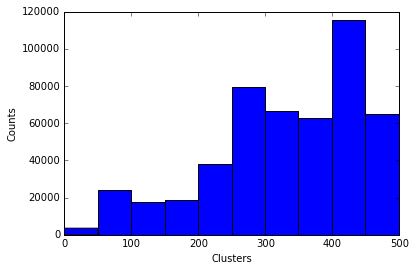

In [19]:
# Plot the distribution of items in the clusters.
x = processed_list["listing_price"].as_matrix()
plt.hist(kmeans.labels_)
plt.ylabel('Counts')
plt.xlabel('Clusters')